## 多层感知机
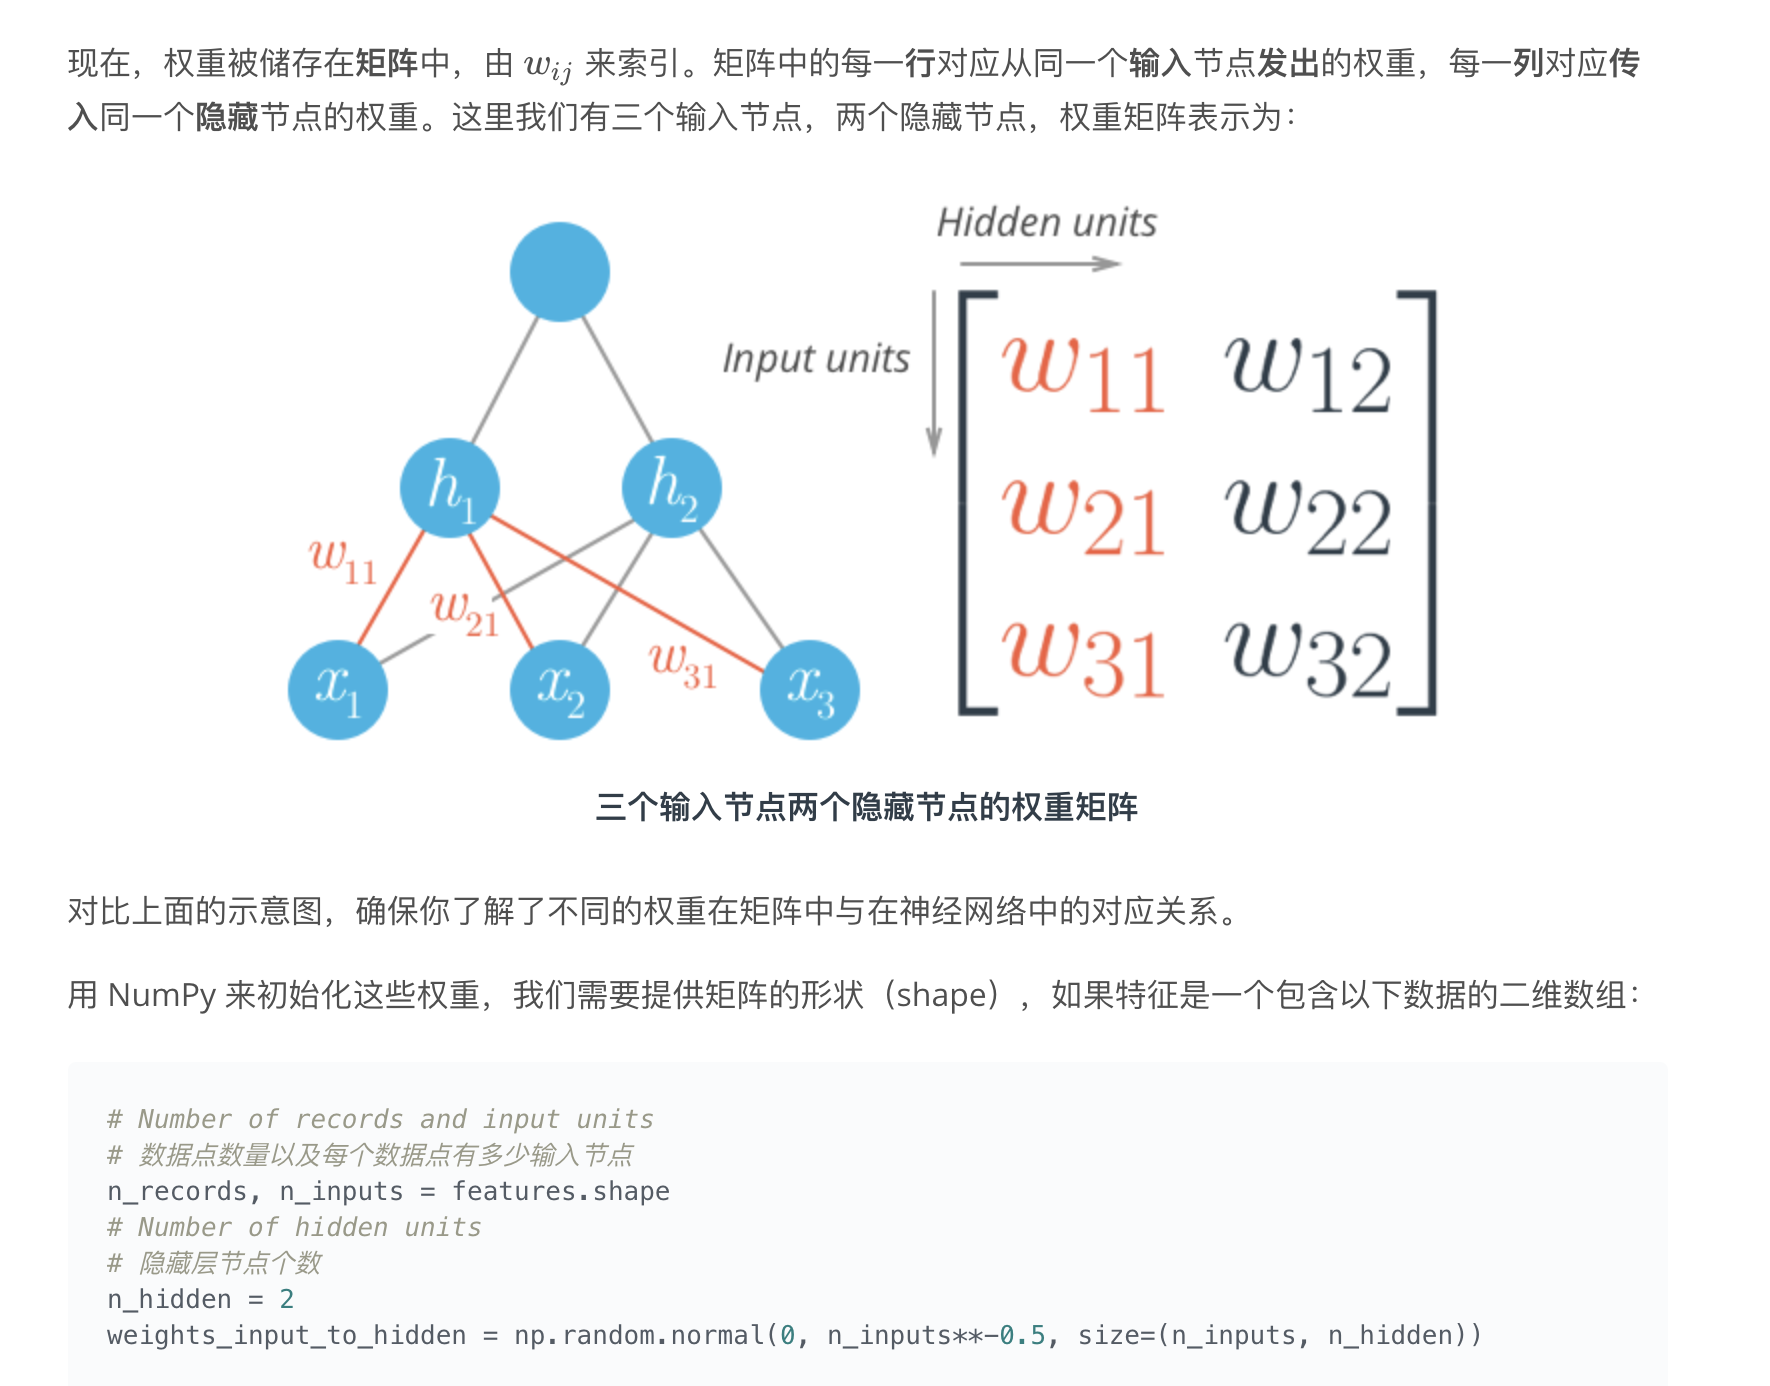

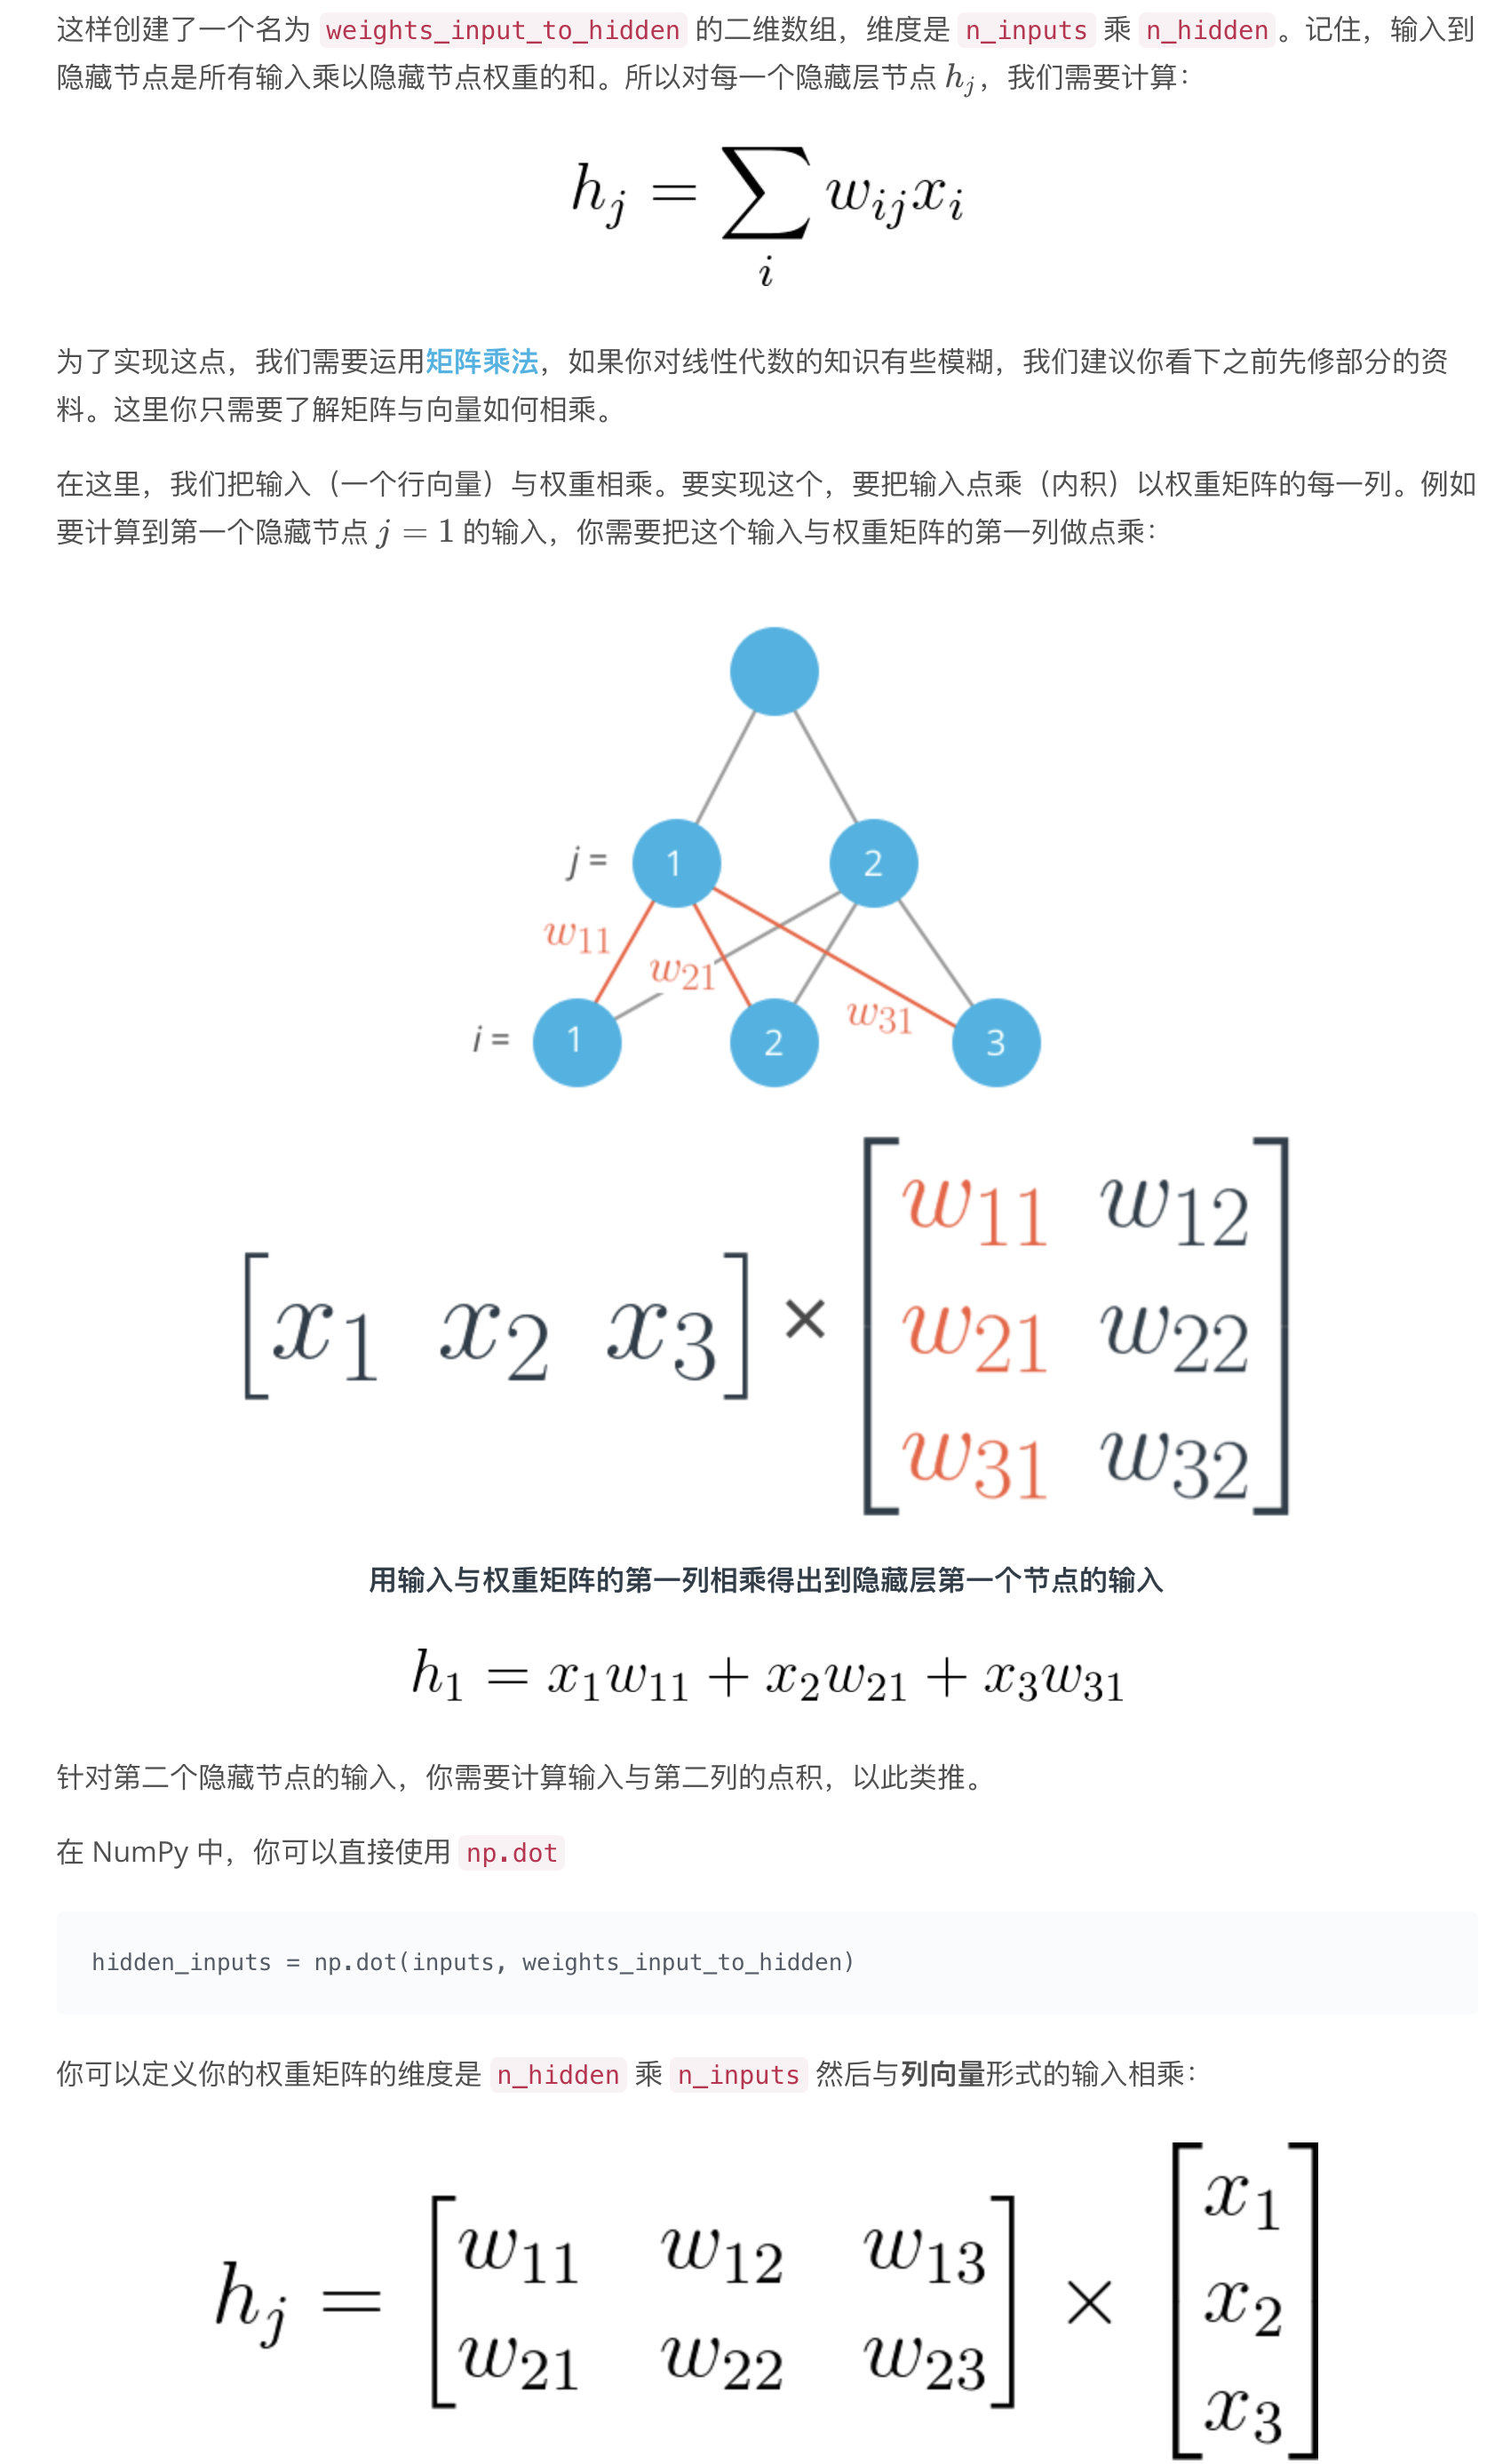

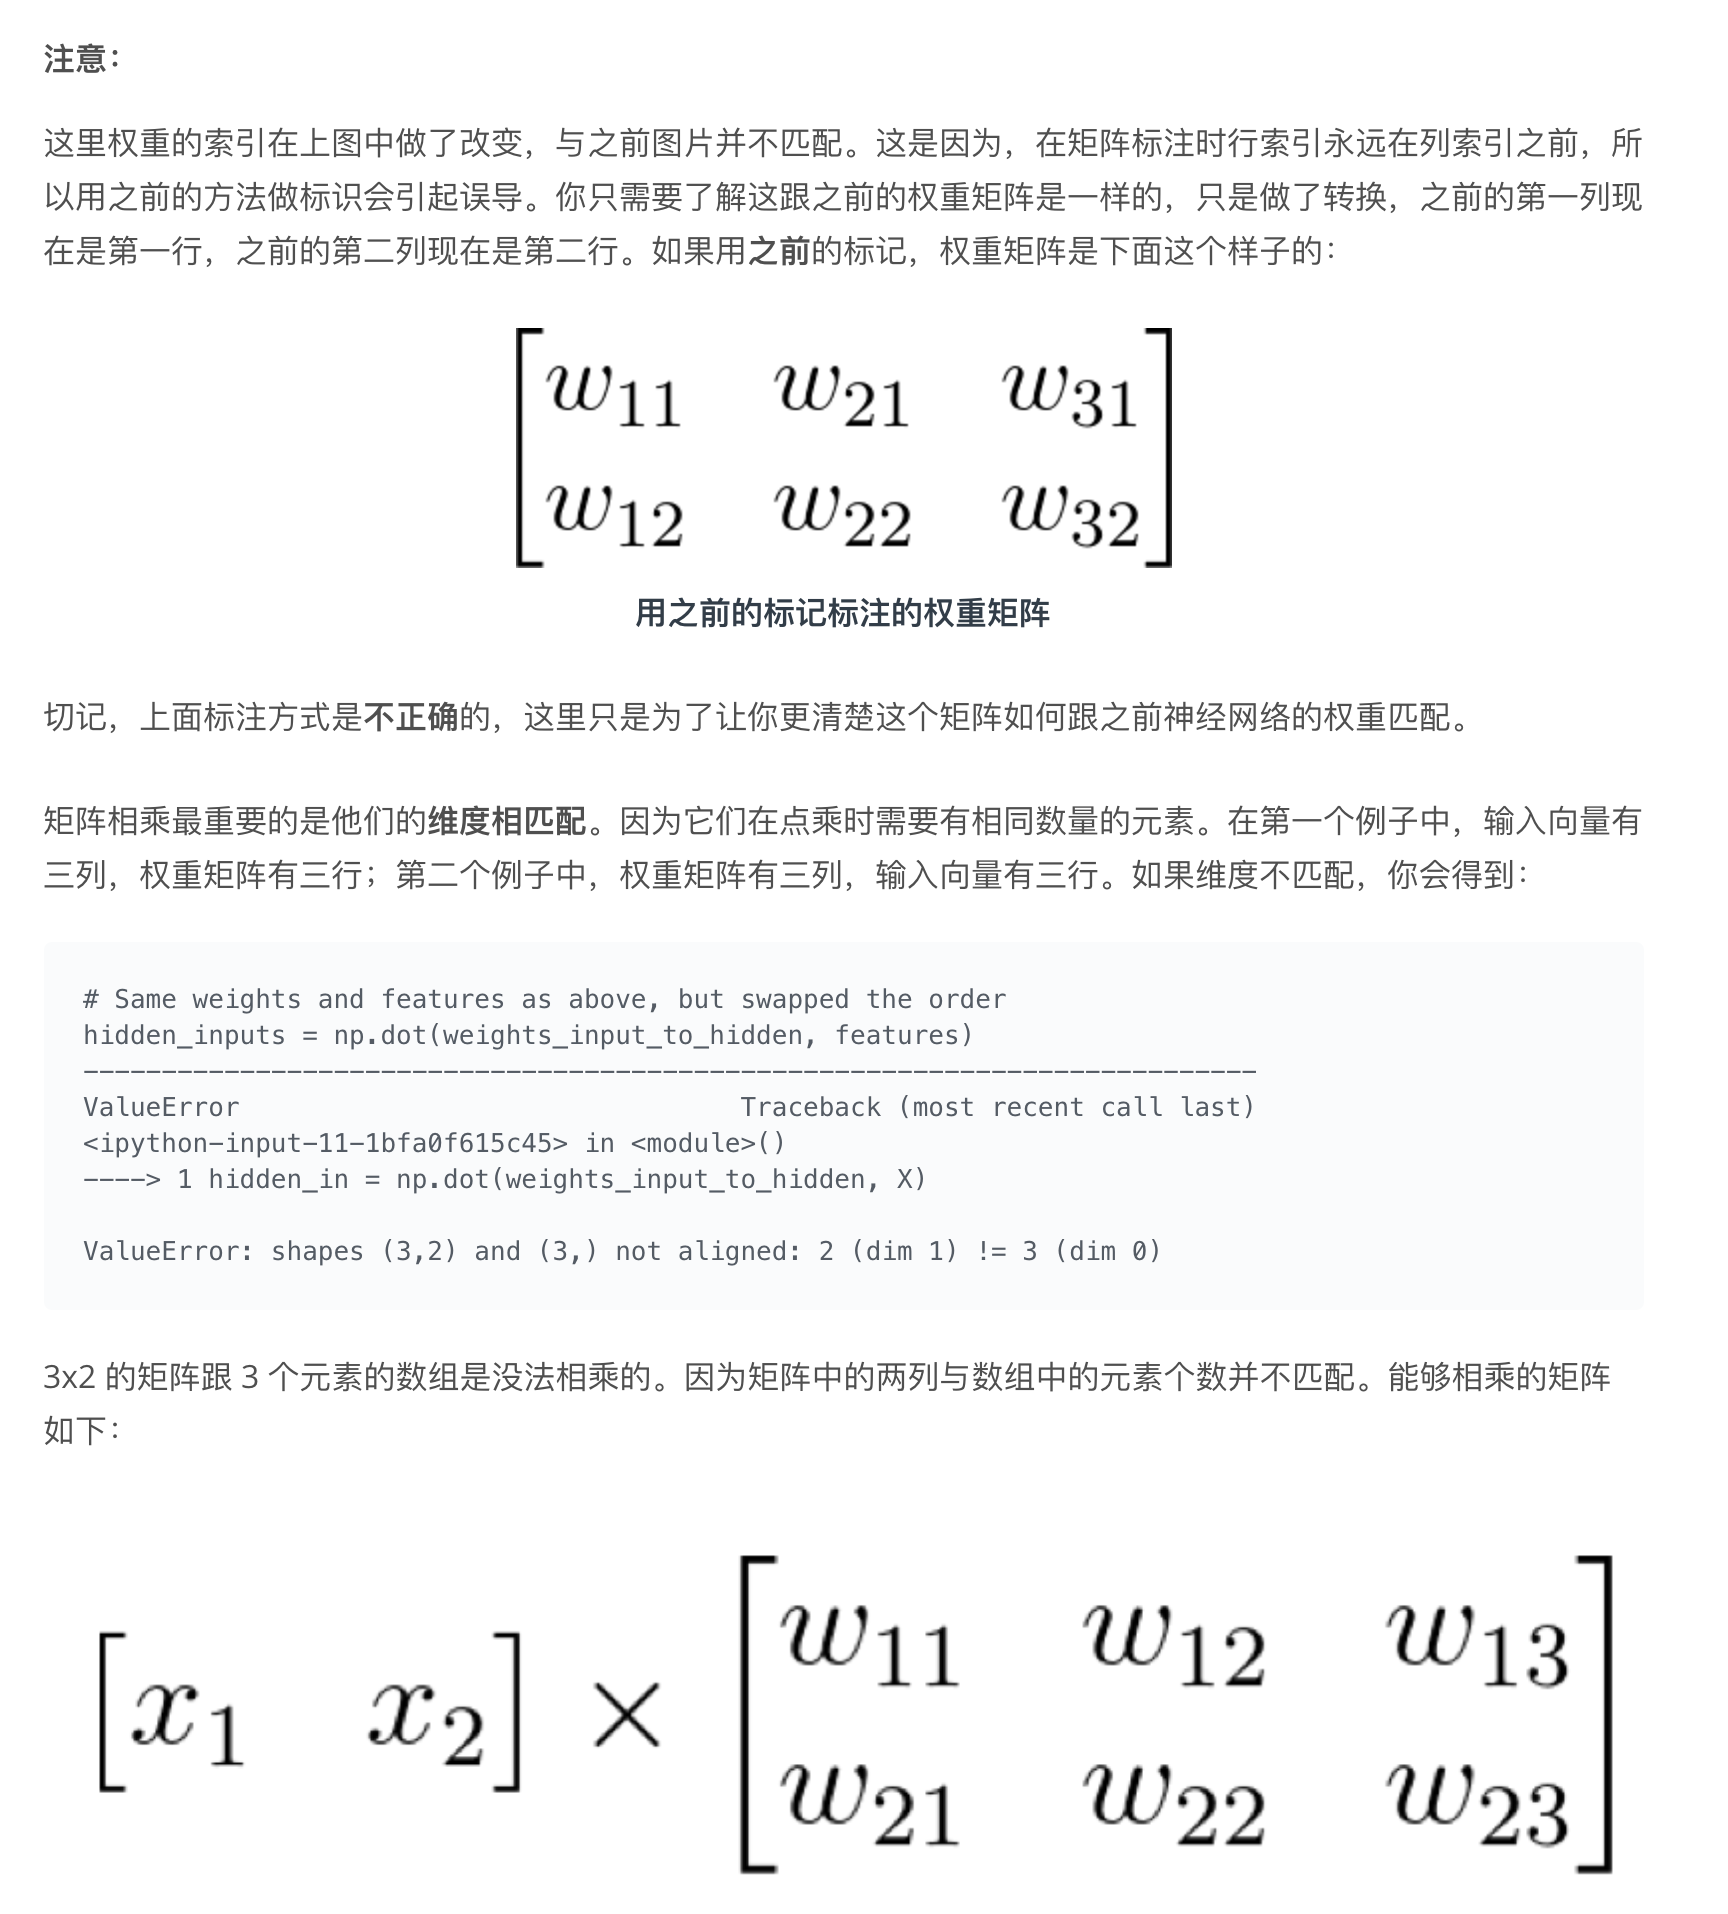

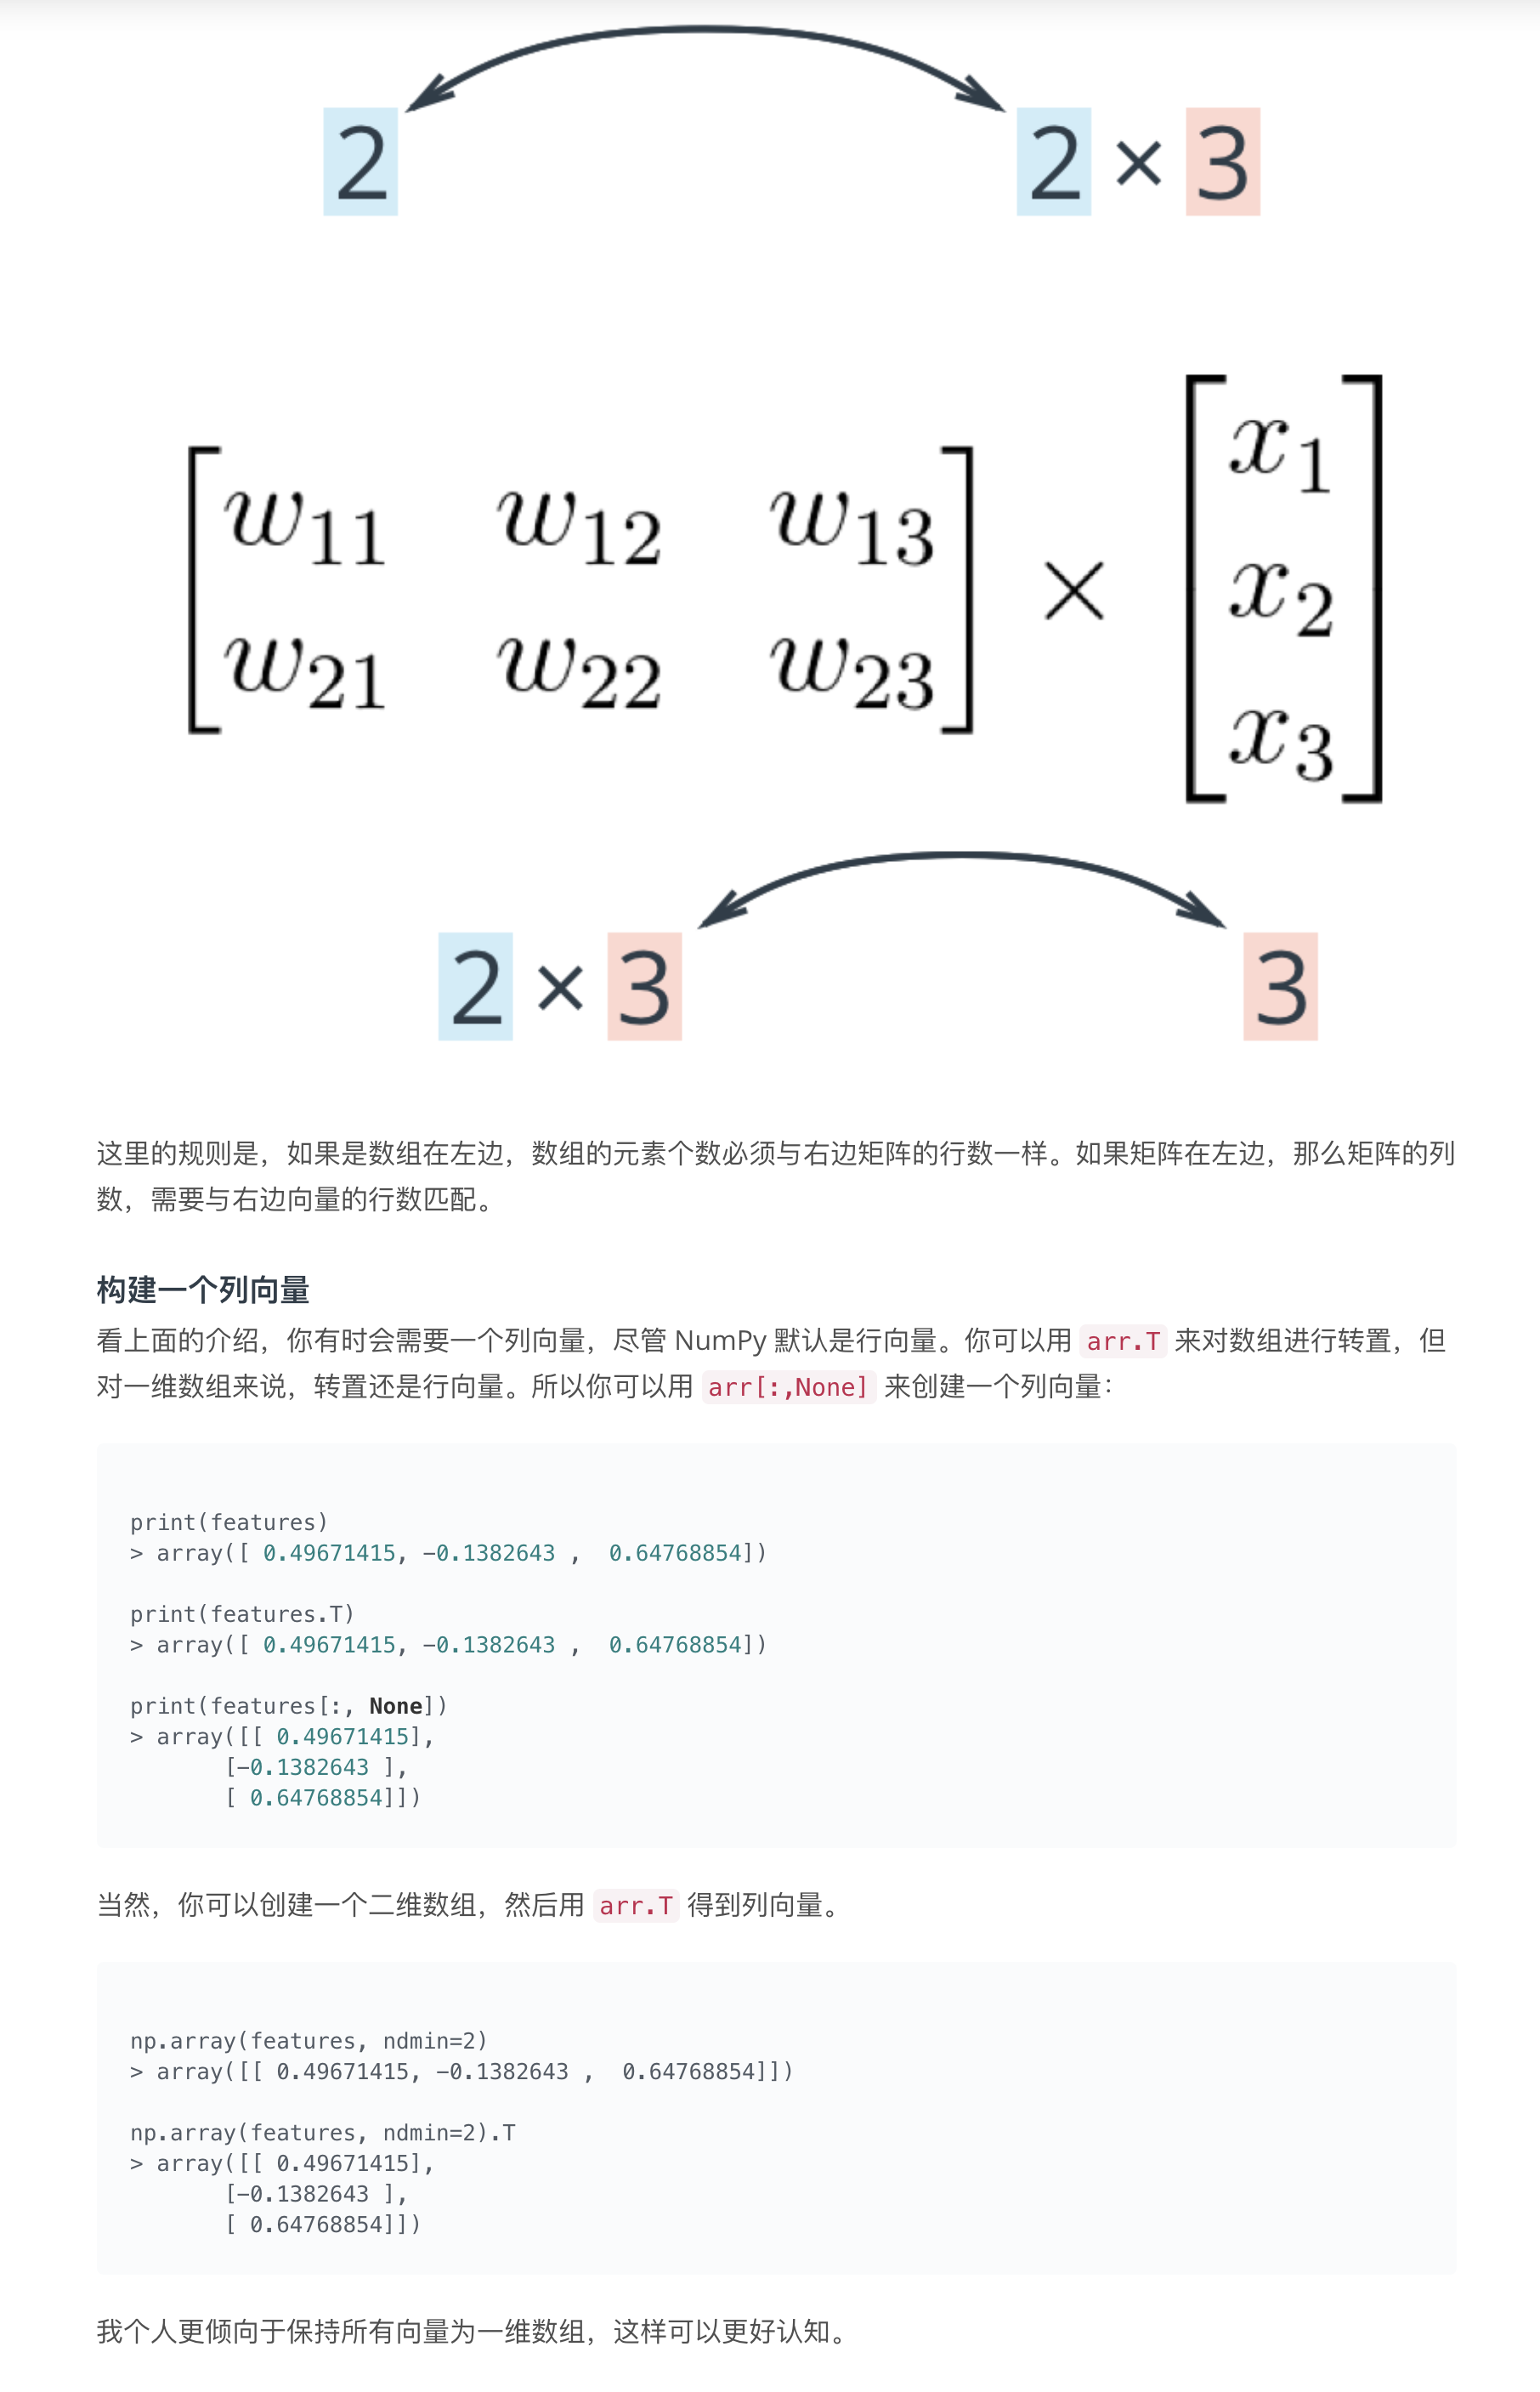

## 多层感知机实现
实现一个4X3X2网络的正向传播，用sigmoid作为两层的激活函数。

In [6]:
import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1+np.exp(-x))

# Network size
N_input = 4
N_hidden = 3
N_output = 2

np.random.seed(42)
# Make some fake data
X = np.random.randn(4)

weights_input_to_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
weights_hidden_to_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))


# TODO: Make a forward pass through the network

hidden_layer_in = np.dot(X,weights_input_to_hidden)
hidden_layer_out = sigmoid(hidden_layer_in)

print('Hidden-layer Output:')
print(hidden_layer_out)

output_layer_in = np.dot(hidden_layer_out,weights_hidden_to_output)
output_layer_out = sigmoid(output_layer_in)

print('Output-layer Output:')
print(output_layer_out)

Hidden-layer Output:
[0.41492192 0.42604313 0.5002434 ]
Output-layer Output:
[0.49815196 0.48539772]


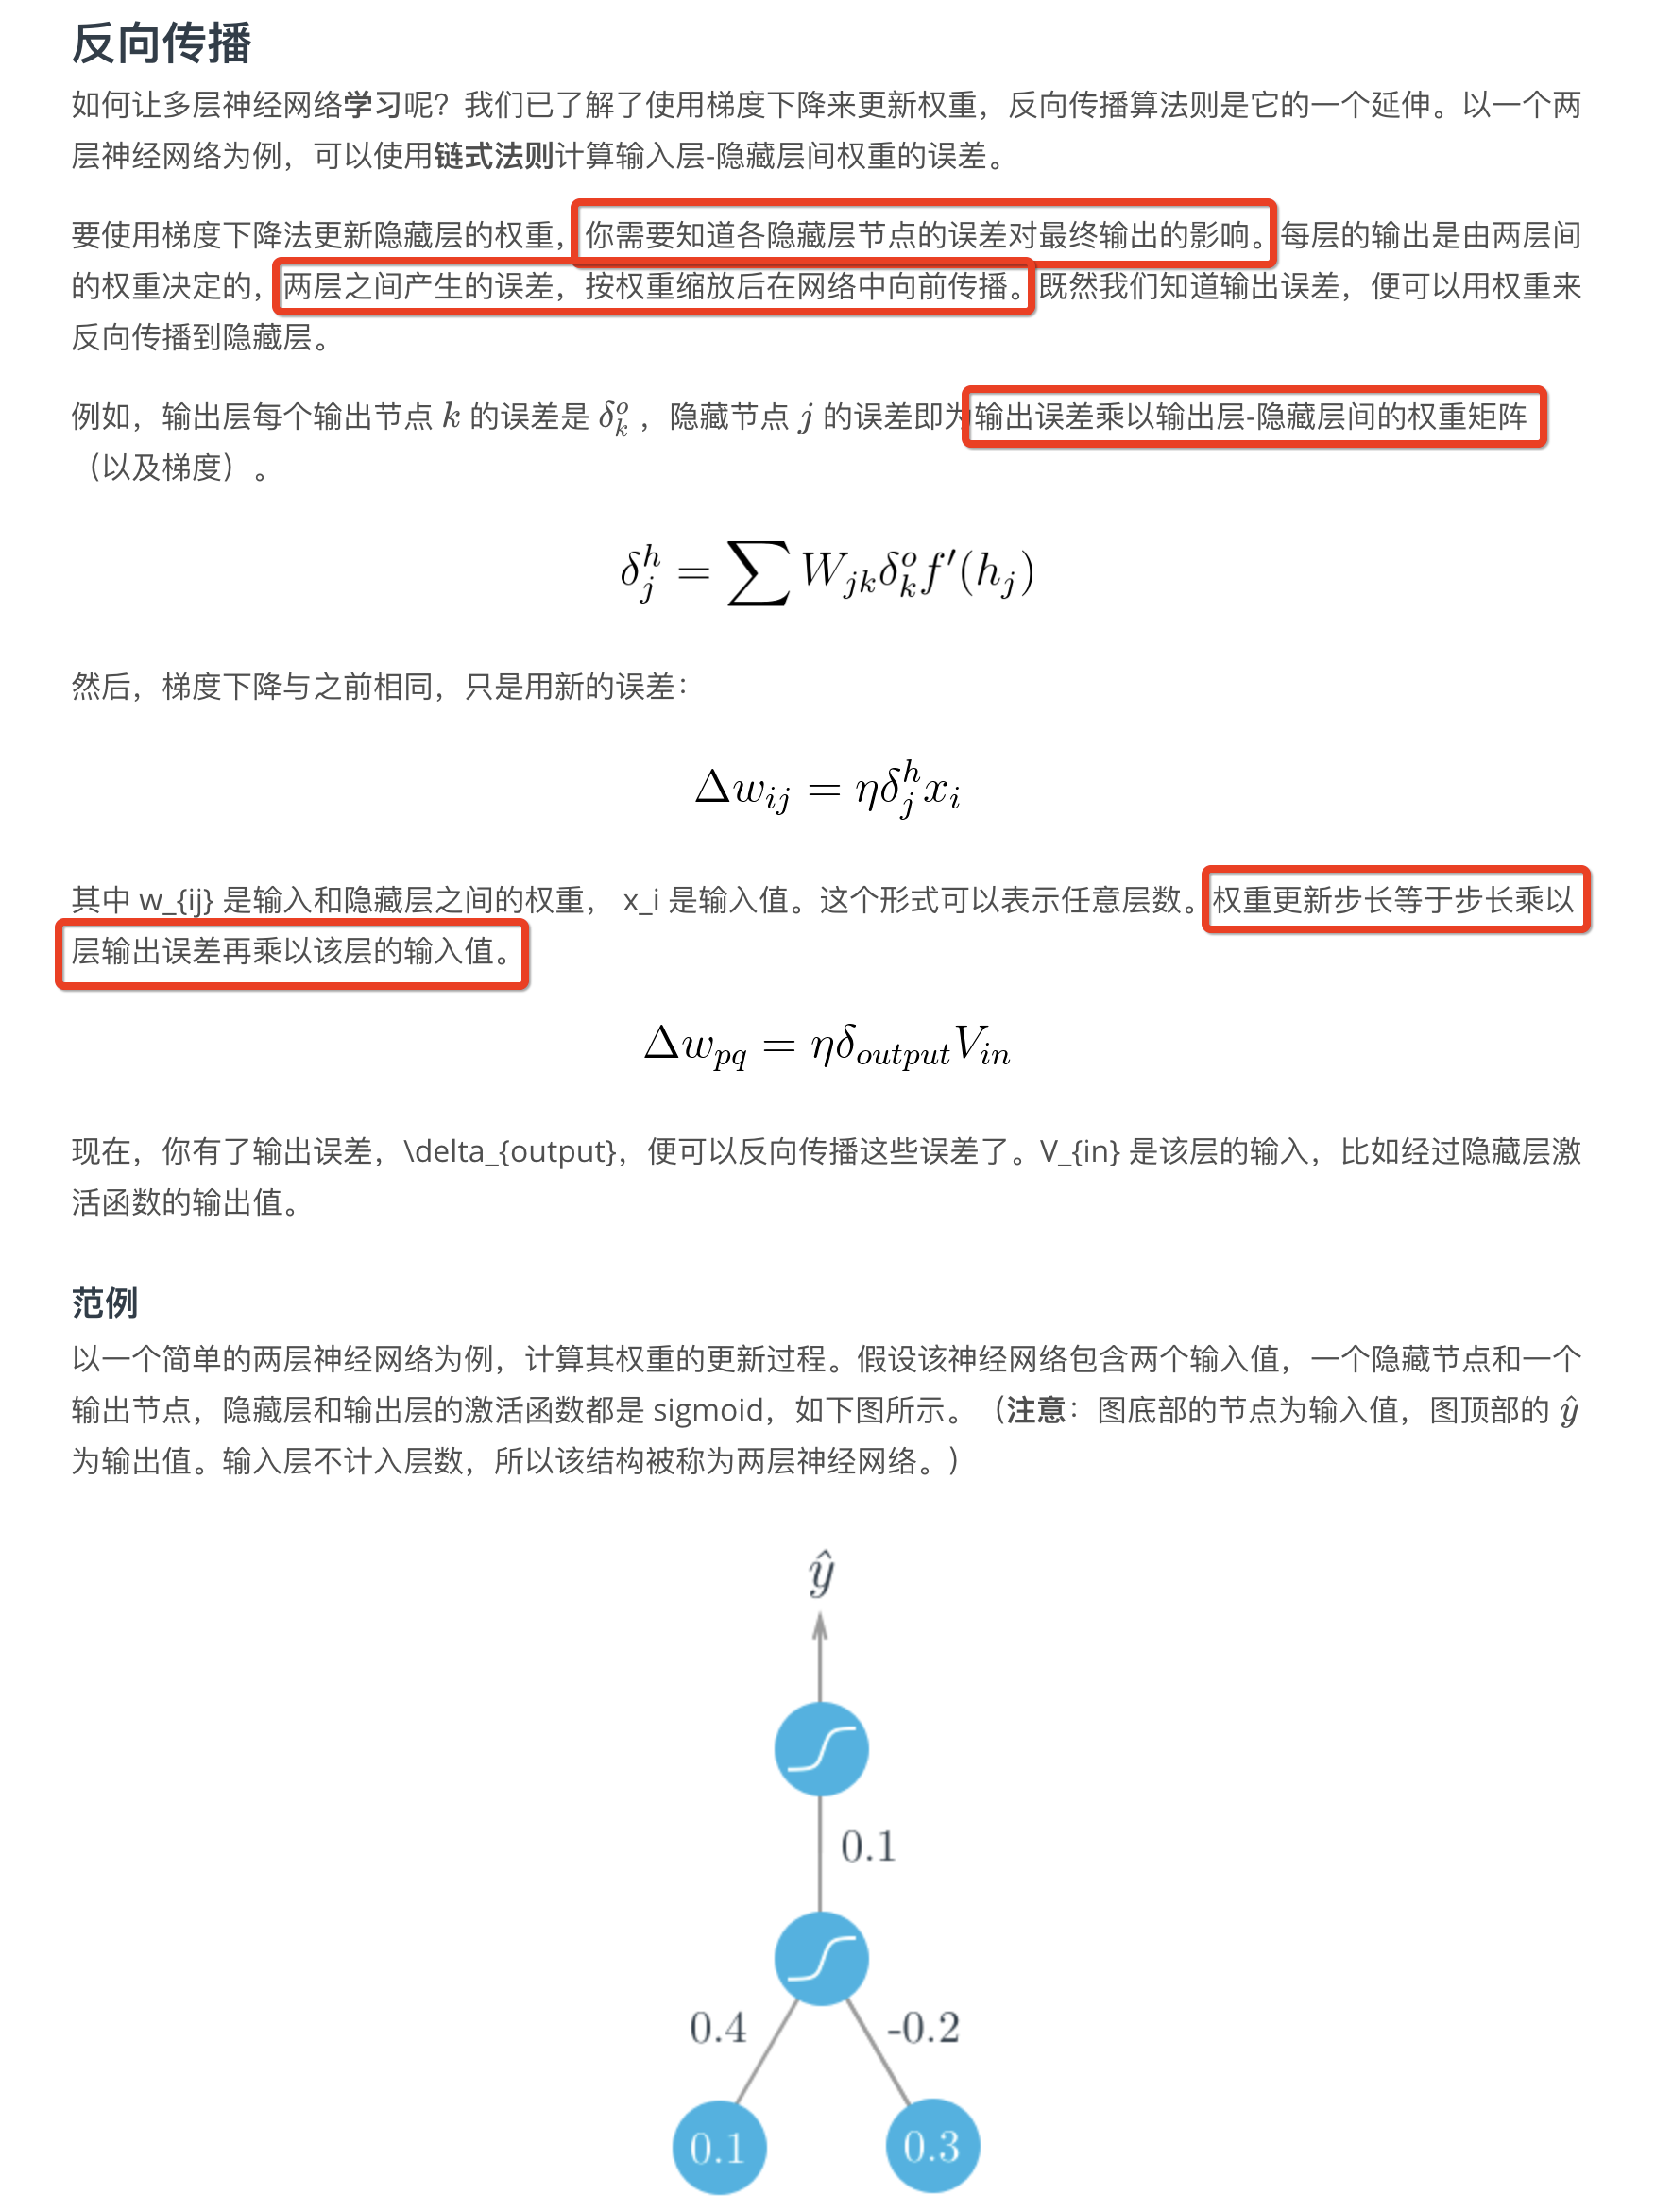

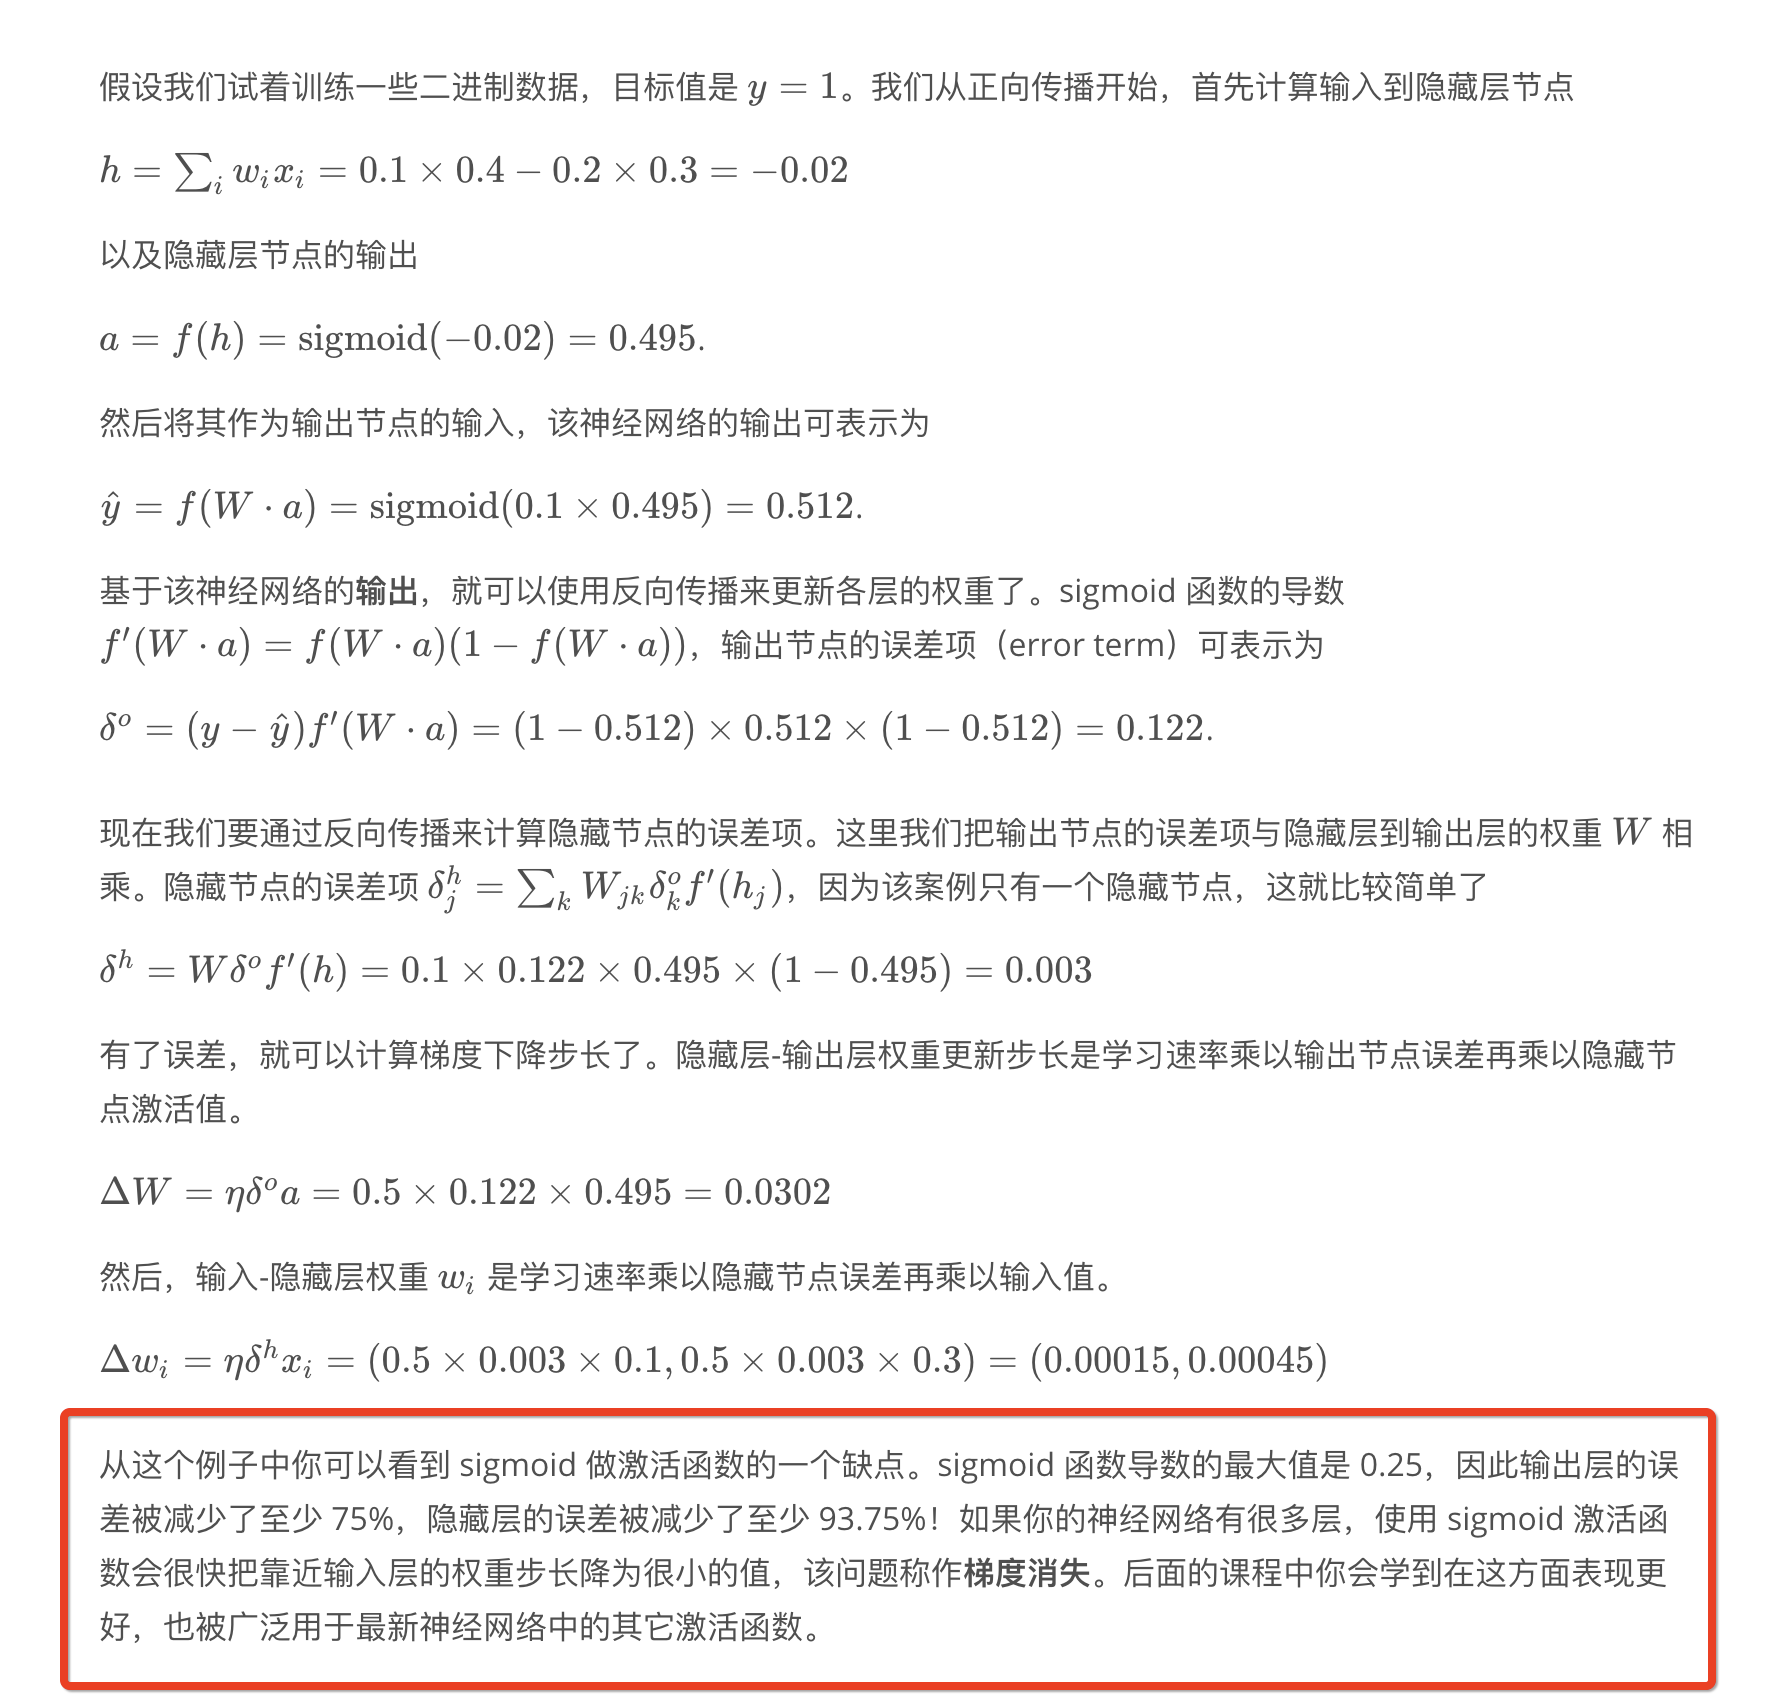

## Numpy实现反向传播

In [10]:
import numpy as np


def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


x = np.array([0.5, 0.1, -0.2])
target = 0.6
learnrate = 0.5

weights_input_hidden = np.array([[0.5, -0.6],
                                 [0.1, -0.2],
                                 [0.1, 0.7]])

weights_hidden_output = np.array([0.1, -0.3])

## Forward pass
hidden_layer_input = np.dot(x, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)
output = sigmoid(output_layer_in)

## Backwards pass
## TODO: Calculate output error
error = target - output

# TODO: Calculate error term for output layer
output_error_term = error * output * (1- output)

# TODO: Calculate error term for hidden layer
hidden_error_term = weights_hidden_output * output_error_term * hidden_layer_output * (1 - hidden_layer_output)

# TODO: Calculate change in weights for hidden layer to output layer
delta_w_h_o = learnrate * output_error_term * hidden_layer_output

# TODO: Calculate change in weights for input layer to hidden layer
delta_w_i_h = learnrate * hidden_error_term * x[:, None]

print('Change in weights for hidden layer to output layer:')
print(delta_w_h_o)
print('Change in weights for input layer to hidden layer:')
print(delta_w_i_h)


Change in weights for hidden layer to output layer:
[0.00804047 0.00555918]
Change in weights for input layer to hidden layer:
[[ 1.77005547e-04 -5.11178506e-04]
 [ 3.54011093e-05 -1.02235701e-04]
 [-7.08022187e-05  2.04471402e-04]]


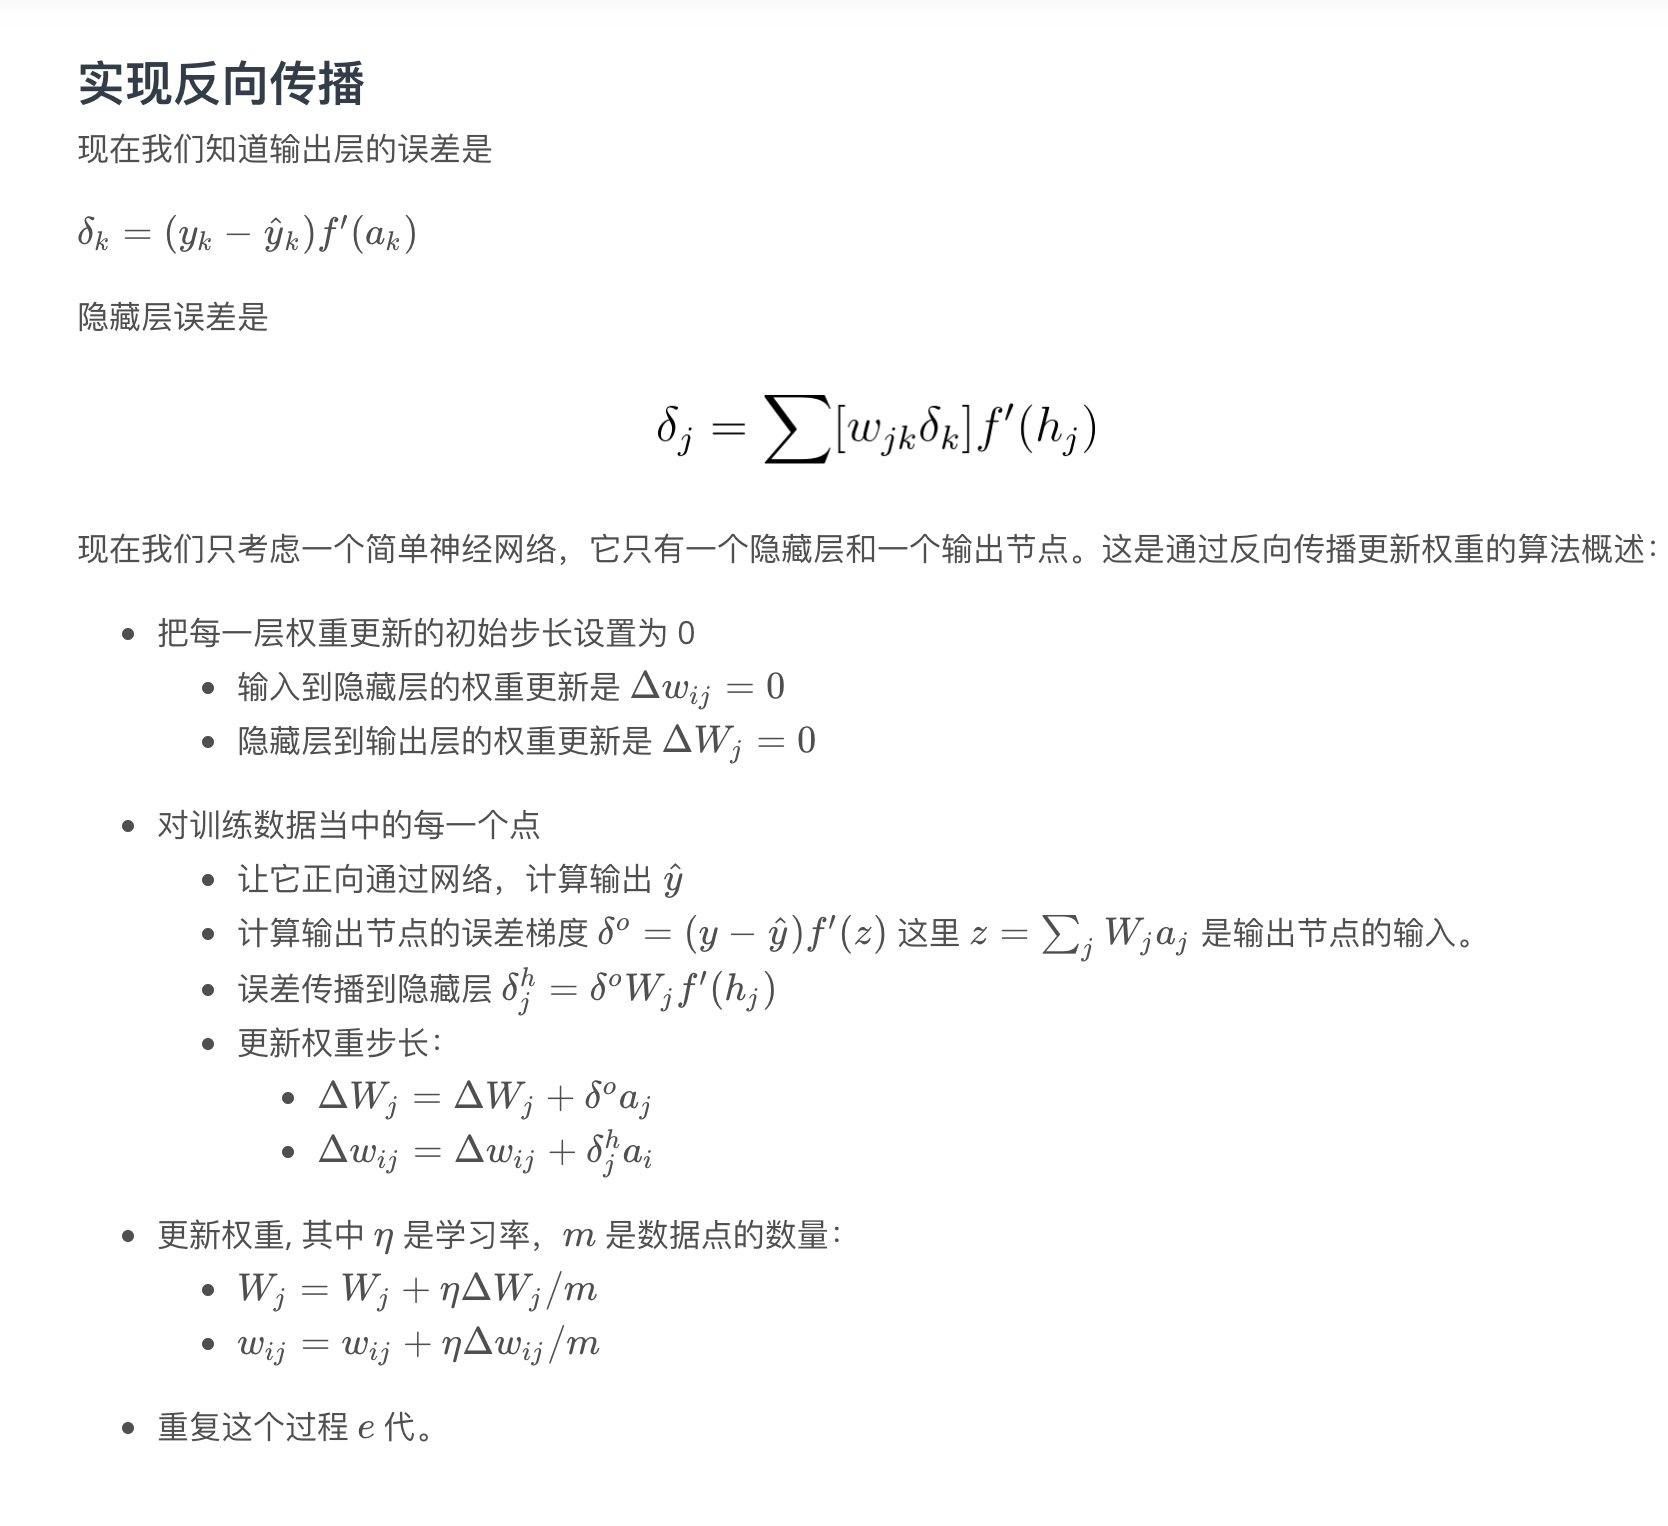

In [11]:
import numpy as np
import pandas as pd

admissions = pd.read_csv('binary.csv')

# Make dummy variables for rank
data = pd.concat([admissions, pd.get_dummies(admissions['rank'], prefix='rank')], axis=1)
data = data.drop('rank', axis=1)

# Standarize features
for field in ['gre', 'gpa']:
    mean, std = data[field].mean(), data[field].std()
    data.loc[:,field] = (data[field]-mean)/std
    
# Split off random 10% of the data for testing
np.random.seed(21)
sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)
data, test_data = data.ix[sample], data.drop(sample)

# Split into features and targets
features, targets = data.drop('admit', axis=1), data['admit']
features_test, targets_test = test_data.drop('admit', axis=1), test_data['admit']

/home/mj/.conda/envs/ten/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [17]:
import numpy as np

np.random.seed(21)

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


# Hyperparameters
n_hidden = 2  # number of hidden units
epochs = 900
learnrate = 0.005

n_records, n_features = features.shape
last_loss = None
# Initialize weights
weights_input_hidden = np.random.normal(scale=1 / n_features ** .5,
                                        size=(n_features, n_hidden))
weights_hidden_output = np.random.normal(scale=1 / n_features ** .5,
                                         size=n_hidden)

for e in range(epochs):
    del_w_input_hidden = np.zeros(weights_input_hidden.shape)
    del_w_hidden_output = np.zeros(weights_hidden_output.shape)
    for x, y in zip(features.values, targets):
        ## Forward pass ##
        # TODO: Calculate the output
        hidden_input = np.dot(x,weights_input_hidden)
        hidden_output = sigmoid(hidden_input)
        output = sigmoid(np.dot(hidden_output,weights_hidden_output))

        ## Backward pass ##
        # TODO: Calculate the network's prediction error
        error = y - output

        # TODO: Calculate error term for the output unit
        output_error_term = error * output * (1-output)

        ## propagate errors to hidden layer

        # TODO: Calculate the hidden layer's contribution to the error
        hidden_error = np.dot(output_error_term,weights_hidden_output)
        
        # TODO: Calculate the error term for the hidden layer
        hidden_error_term = hidden_error * hidden_output * (1 - hidden_output)
        
        # TODO: Update the change in weights
        del_w_hidden_output +=  output_error_term * hidden_output#隐藏层
        del_w_input_hidden += hidden_error_term * x[:,None]#输入

    # TODO: Update weights
    weights_input_hidden += learnrate * del_w_input_hidden / n_records
    weights_hidden_output += learnrate * del_w_hidden_output / n_records

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        hidden_output = sigmoid(np.dot(x, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - targets) ** 2)

        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss

# Calculate accuracy on test data
hidden = sigmoid(np.dot(features_test, weights_input_hidden))
out = sigmoid(np.dot(hidden, weights_hidden_output))
predictions = out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))


Train loss:  0.25135725242598617
Train loss:  0.24996540718842886
Train loss:  0.24862005218904654
Train loss:  0.24731993217179746
Train loss:  0.24606380465584848
Train loss:  0.24485044179257162
Train loss:  0.2436786320186832
Train loss:  0.24254718151769536
Train loss:  0.24145491550165465
Train loss:  0.24040067932493367
Prediction accuracy: 0.725


## 反向传播补充

https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b#.vt3ax2kg9

https://www.youtube.com/watch?v=59Hbtz7XgjM